<a href="https://colab.research.google.com/github/imksp/Data-Analysis-with-Open-Source/blob/main/exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **과제 1-1**

In [3]:
import requests

# 본인의 인증키 입력
api_key = '4944414453696d6b3334716e636a6b'

# URL 구성
url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/5/2025/01/"

# API 호출
req_response = requests.get(url)

# 호출 성공 여부 확인
if req_response.status_code == 200:
    print("API 호출 성공")
    print(req_response.json())
else:
    print(f"API 호출 실패: {req_response.status_code}")

API 호출 성공
{'energyUseDataSummaryInfo': {'list_total_count': 7, 'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'}, 'row': [{'YEAR': '2025', 'MON': '01', 'MM_TYPE': '개인', 'CNT': '1254911', 'EUS': '293836031', 'EUS1': '294950734', 'EUS2': '299856505', 'ECO2_1': '-3567588.5', 'ECO2_2': '-3390415.508', 'GUS': '64743317', 'GUS1': '65640270', 'GUS2': '70129681', 'GCO2_1': '-3112082', 'GCO2_2': '-6224164', 'WUS': '14290250.9', 'WUS1': '14349702.2', 'WUS2': '14658723.9', 'WCO2_1': '-213962.15', 'WCO2_2': '-343069.116', 'HUS': '26079633.15', 'HUS1': '26915271.488', 'HUS2': '28567284.736', 'HCO2_1': '-1661644.962', 'HCO2_2': '-1825469.852831888', 'REG_DATE': '2025-04-01 04:02:46.0'}, {'YEAR': '2025', 'MON': '01', 'MM_TYPE': '공공기관', 'CNT': '2458', 'EUS': '159137367', 'EUS1': '161224118', 'EUS2': '165177059', 'ECO2_1': '-4063221.5', 'ECO2_2': '-4063221.5', 'GUS': '5245062', 'GUS1': '6339106', 'GUS2': '6122197', 'GCO2_1': '-985669.5', 'GCO2_2': '-1971339', 'WUS': '1109496.9', 'WUS1': '1067063.

# **과제 1-2**

In [4]:
import requests
import pandas as pd

# 연도-월 리스트 생성 함수
def get_year_months():
    year_months = []
    for year in range(2015, 2025):  # 2024까지 포함
        for month in range(1, 13):  # 1월부터 12월까지
            year_months.append(f'{year}{month:02d}')
    return year_months

# API 키와 기본 URL 설정
api_key = '4944414453696d6b3334716e636a6b'  # 본인의 인증키
base_url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/5"

responses = []

# 월별 데이터 수집
for year_month in get_year_months():
    year = year_month[:4]
    month = year_month[4:]
    url = f"{base_url}/{year}/{month}/"

    # API 호출
    response = requests.get(url)

    # 데이터 수집
    if response.status_code == 200:
        data = response.json()
        rows = data['energyUseDataSummaryInfo']['row']
        for item in rows:
            if item['MM_TYPE'] == '개인':
                # 필요한 컬럼만 추출
                responses.append({
                    'YEAR': item['YEAR'],
                    'MON': item['MON'],
                    'EUS': item['EUS'],
                    'GUS': item['GUS'],
                    'WUS': item['WUS'],
                    'HUS': item['HUS']
                })
    else:
        print(f"{year}-{month} API 호출 실패: {response.status_code}")

import json
print(responses[:5])  # 상위 5개만 출력


[{'YEAR': '2015', 'MON': '01', 'EUS': '193784708', 'GUS': '59133720', 'WUS': '12819757.886', 'HUS': '22740838.937'}, {'YEAR': '2015', 'MON': '02', 'EUS': '189974230', 'GUS': '56487358', 'WUS': '12656888.218', 'HUS': '18793320.213'}, {'YEAR': '2015', 'MON': '05', 'EUS': '177289769', 'GUS': '22060892', 'WUS': '13086734.214', 'HUS': '1320895.801'}, {'YEAR': '2015', 'MON': '06', 'EUS': '186073153', 'GUS': '12677645', 'WUS': '14241651.402', 'HUS': '294312.634'}, {'YEAR': '2015', 'MON': '07', 'EUS': '165114568', 'GUS': '8893640', 'WUS': '12083879.038', 'HUS': '702863.645'}]


In [2]:
# 한글 처리를 위한 matplotlib 설정 (1)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# **런타임 -> 세션 다시 시작**
# 과제 3-1의 한글 처리를 위해 이 위치에 있음.
# df 만들기 전에 처리

In [5]:
# 한글 처리를 위한 matplotlib 설정 (2)

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# **과제 2-1**

In [6]:
# 데이터 변환
df = pd.DataFrame(responses)
print(df.head())  # 상위 5개 행 출력


   YEAR MON        EUS       GUS           WUS           HUS
0  2015  01  193784708  59133720  12819757.886  22740838.937
1  2015  02  189974230  56487358  12656888.218  18793320.213
2  2015  05  177289769  22060892  13086734.214   1320895.801
3  2015  06  186073153  12677645  14241651.402    294312.634
4  2015  07  165114568   8893640  12083879.038    702863.645


# **과제 2-2**

In [7]:
# 월 → 계절 매핑 딕셔너리
season_map = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

# MON 컬럼이 문자열이면 정수로 변환
df['MON'] = df['MON'].astype(int)

# 계절 컬럼 추가
df['SEASON'] = df['MON'].map(season_map)
print(df[['YEAR', 'MON', 'SEASON']].head())


   YEAR  MON  SEASON
0  2015    1  Winter
1  2015    2  Winter
2  2015    5  Spring
3  2015    6  Summer
4  2015    7  Summer


# **과제 3-1**

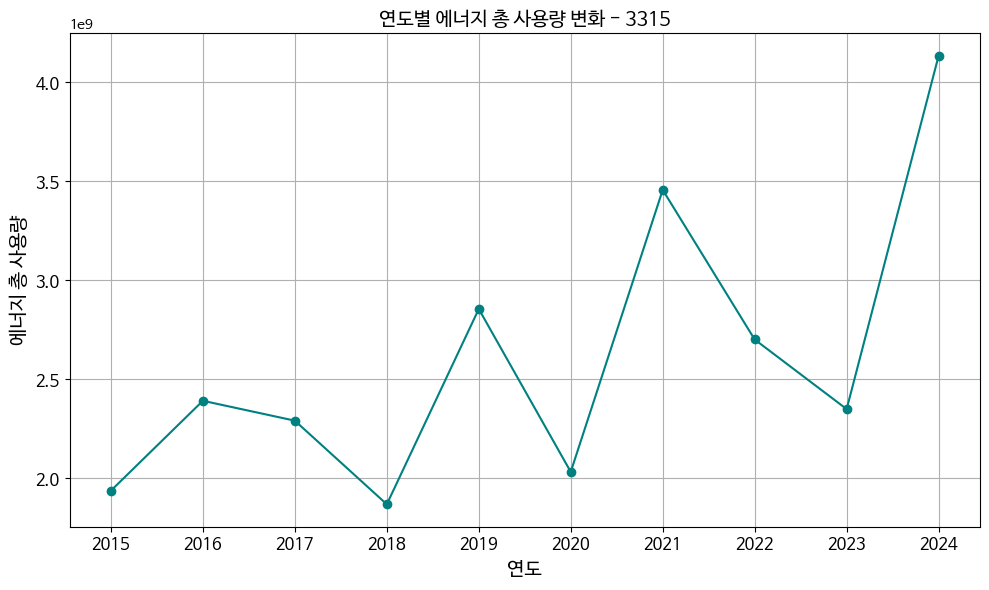

In [35]:
import matplotlib.pyplot as plt

# 문자열 → 숫자 변환
df[['EUS', 'GUS', 'WUS', 'HUS']] = df[['EUS', 'GUS', 'WUS', 'HUS']].astype(float)

# 연도별 총 사용량 계산
df['TOTAL_USAGE'] = df['EUS'] + df['GUS'] + df['WUS'] + df['HUS']
yearly_usage = df.groupby('YEAR')['TOTAL_USAGE'].sum().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(yearly_usage['YEAR'], yearly_usage['TOTAL_USAGE'], marker='o', linestyle='-', color='teal')
plt.title('연도별 에너지 총 사용량 변화 - 3315', fontsize=14)  # 학번 뒤 4자리 반영
plt.xlabel('연도', fontsize=14)
plt.ylabel('에너지 총 사용량', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('energy_usage_by_year_3315.png')  # 그래프 저장
plt.show()

# **과제 3-2**

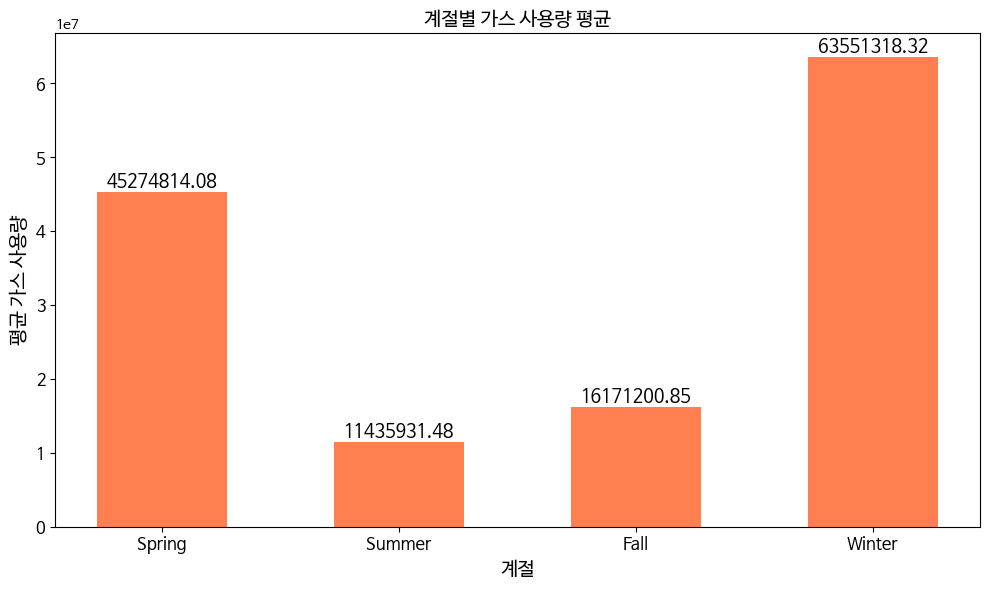

In [37]:
# 계절별 평균 가스 사용량 계산
season_gas = df.groupby('SEASON')['GUS'].mean().reset_index()
season_gas['GUS'] = season_gas['GUS'].astype(float)

# 계절 순서
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
season_gas = season_gas.set_index('SEASON').loc[season_order].reset_index()

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(season_gas['SEASON'], season_gas['GUS'], color='coral', width=0.55)

# 막대 위에 수치 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=13
             )

plt.title('계절별 가스 사용량 평균', fontsize=14)
plt.xlabel('계절', fontsize=14)
plt.ylabel('평균 가스 사용량', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('season_gas_usage.png')  # 그래프 저장
plt.show()